<a href="https://colab.research.google.com/github/zwu269/team-work/blob/main/%E5%BC%80%E5%9B%A2%E8%AE%A2%E5%8D%95%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving self-platform.xlsx to self-platform.xlsx


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
#obtain data 
#Loading the dataset
df_ta = pd.read_excel('self-platform.xlsx')

#Print the firsdat 5 rows of the dataframe.
df_ta.head()

,订单号,订单商品ID,order_name,quality,price after tax,tax price,discount,status,deleivery,leader,经销商
0,612,968,Plum seven Duck mayonnaise fresh salad oil 45...,1,12.99,0.0,0.0,confirmed,completed,Jason（Markham）,自营平台
1,638,1021,Brand new All Cooked Lucky Box (48pcs) to welc...,1,28.00,0.0,0.0,cancel,Cancelled,Anna Wang,自营平台
2,693,1135,Brand new All Cooked Lucky Box (48pcs) to welc...,1,28.00,0.0,0.0,confirmed,completed,Faith,自营平台
3,741,1245,Brand new All Cooked Lucky Box (48pcs) to welc...,1,28.00,0.0,0.0,confirmed,completed,Queeny (Ottawa),自营平台
4,925,1564,Plum seven Duck mayonnaise fresh salad oil 45 ...,1,12.99,0.0,0.0,confirmed,completed,Christina Xie （Ottawa）（暂不接单）,自营平台



**Basic EDA and statistical**
```



In [4]:
## gives information about the data types,columns, null value counts, memory usage etc
## function reference : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
df_ta.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   订单号              767 non-null    int64  
 1   订单商品ID           767 non-null    int64  
 2   order_name       767 non-null    object 
 3   quality          767 non-null    int64  
 4   price after tax  767 non-null    float64
 5   tax price        767 non-null    float64
 6   discount         767 non-null    float64
 7   status           767 non-null    object 
 8   deleivery        767 non-null    object 
 9   leader           767 non-null    object 
 10  经销商              767 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 66.0+ KB


In [5]:
#dataset descirbe tell us a precentail 
df_ta.describe()

,订单号,订单商品ID,quality,price after tax,tax price,discount
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,16831.295958,38889.243807,1.795306,39.445724,1.499374,-0.174850
std,15524.843057,35646.101278,2.236320,105.819348,9.264592,0.987596
min,612.000000,968.000000,1.000000,3.000000,0.000000,-10.000000
25%,3026.000000,6715.000000,1.000000,4.990000,0.000000,0.000000
50%,10375.000000,24657.000000,1.000000,12.990000,0.000000,0.000000
75%,32740.500000,75184.000000,2.000000,39.990000,0.000000,0.000000
max,47103.000000,107584.000000,26.000000,1377.740000,136.490000,0.000000


In [6]:
df_ta.describe().T

,count,mean,std,min,25%,50%,75%,max
订单号,767.0,16831.295958,15524.843057,612.0,3026.00,10375.00,32740.50,47103.00
订单商品ID,767.0,38889.243807,35646.101278,968.0,6715.00,24657.00,75184.00,107584.00
quality,767.0,1.795306,2.236320,1.0,1.00,1.00,2.00,26.00
price after tax,767.0,39.445724,105.819348,3.0,4.99,12.99,39.99,1377.74
tax price,767.0,1.499374,9.264592,0.0,0.00,0.00,0.00,136.49
discount,767.0,-0.174850,0.987596,-10.0,0.00,0.00,0.00,0.00


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 35746 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21333 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21495 missing from current font.
  font.set_text

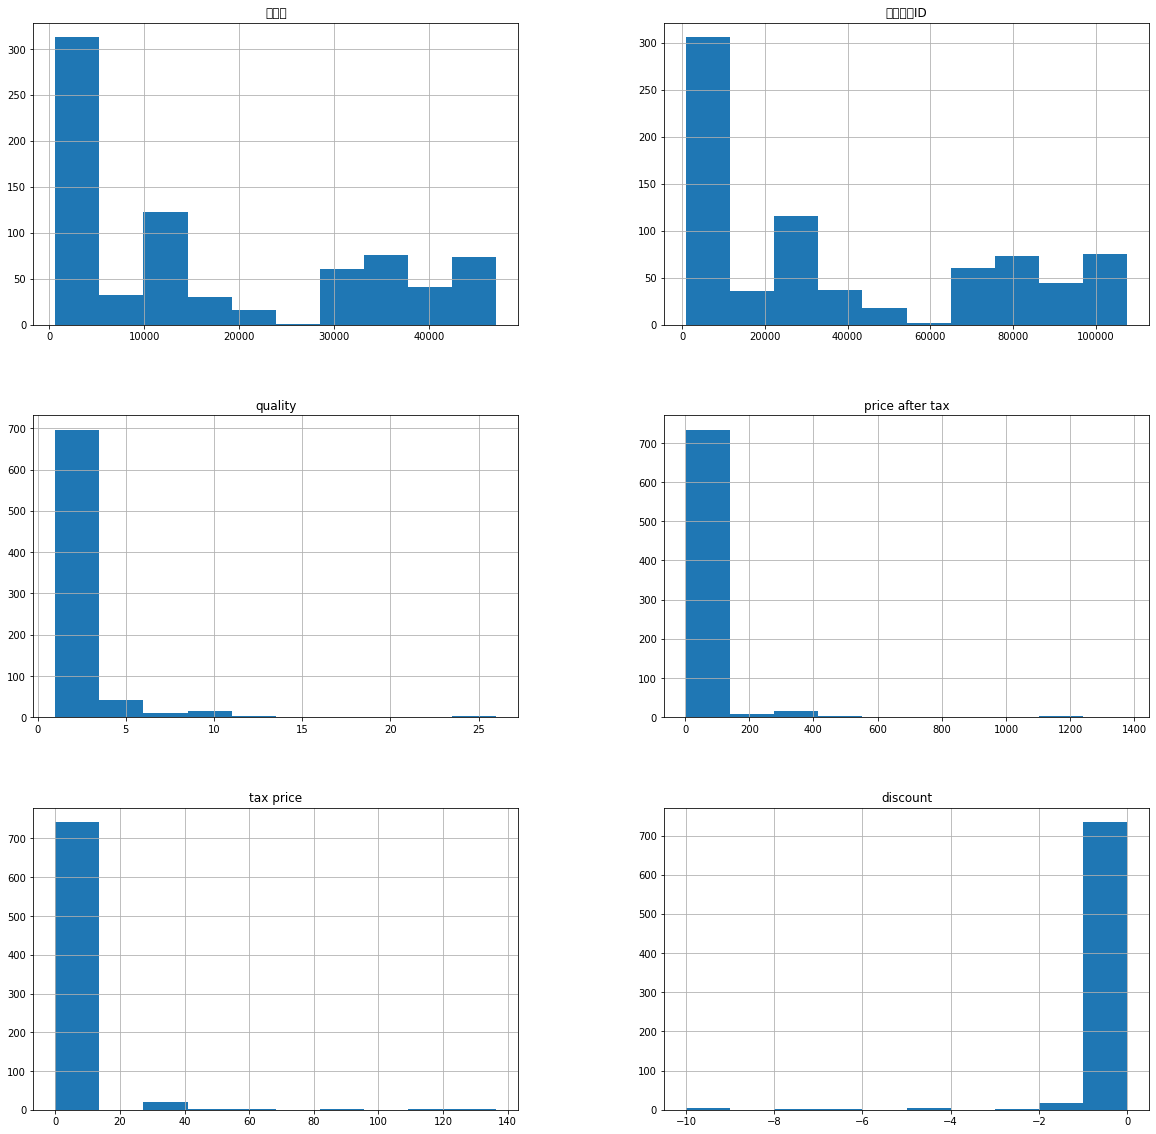

In [7]:
p = df_ta.hist(figsize = (20,20))


In [8]:
#df_ta_copy['order name'].fillna(df_ta_copy['order name'].mean(), inplace = True)
#df_ta_copy['order_name'].fillna(df_ta_copy['order_name'].mean(), inplace = True)
#df_ta_copy['price after tax'].fillna(df_ta_copy['price after tax'].median(), inplace = True)
#df_ta_copy['tax price'].fillna(df_ta_copy['tax price'].median(), inplace = True)
#df_ta_copy['discount'].fillna(df_ta_copy['discount'].median(), inplace = True)

In [9]:
df_ta.columns

Index(['订单号', '订单商品ID', 'order_name', 'quality', 'price after tax',
       'tax price', 'discount', 'status', 'deleivery', 'leader', '经销商'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 35746 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21333 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21495 missing from current font.
  font.set_text

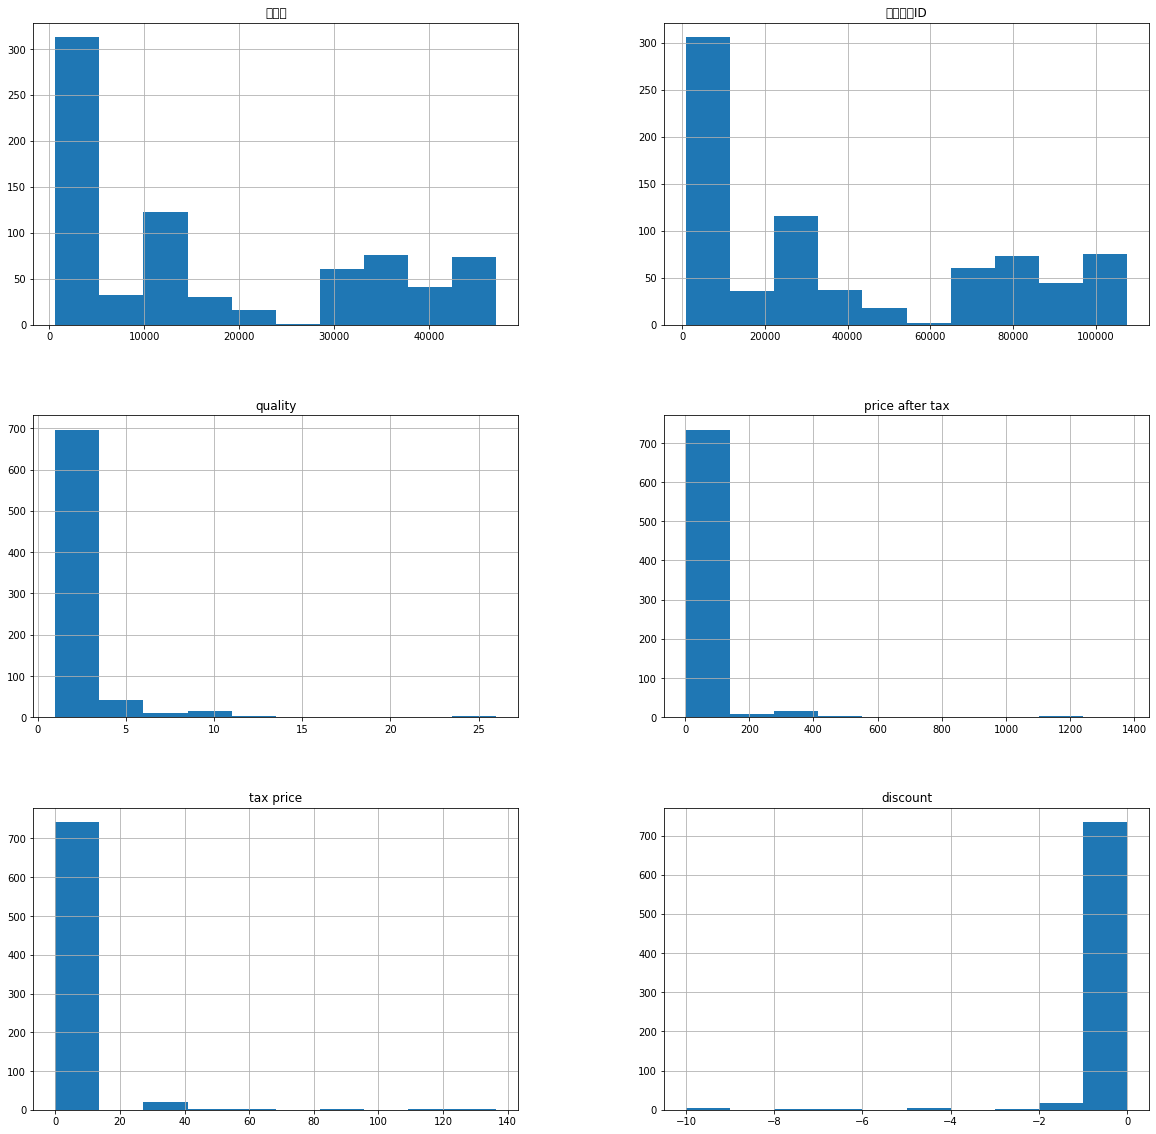

In [10]:
p = df_ta.hist(figsize = (20,20))


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21697 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32463 missing from current font.
  font.set_

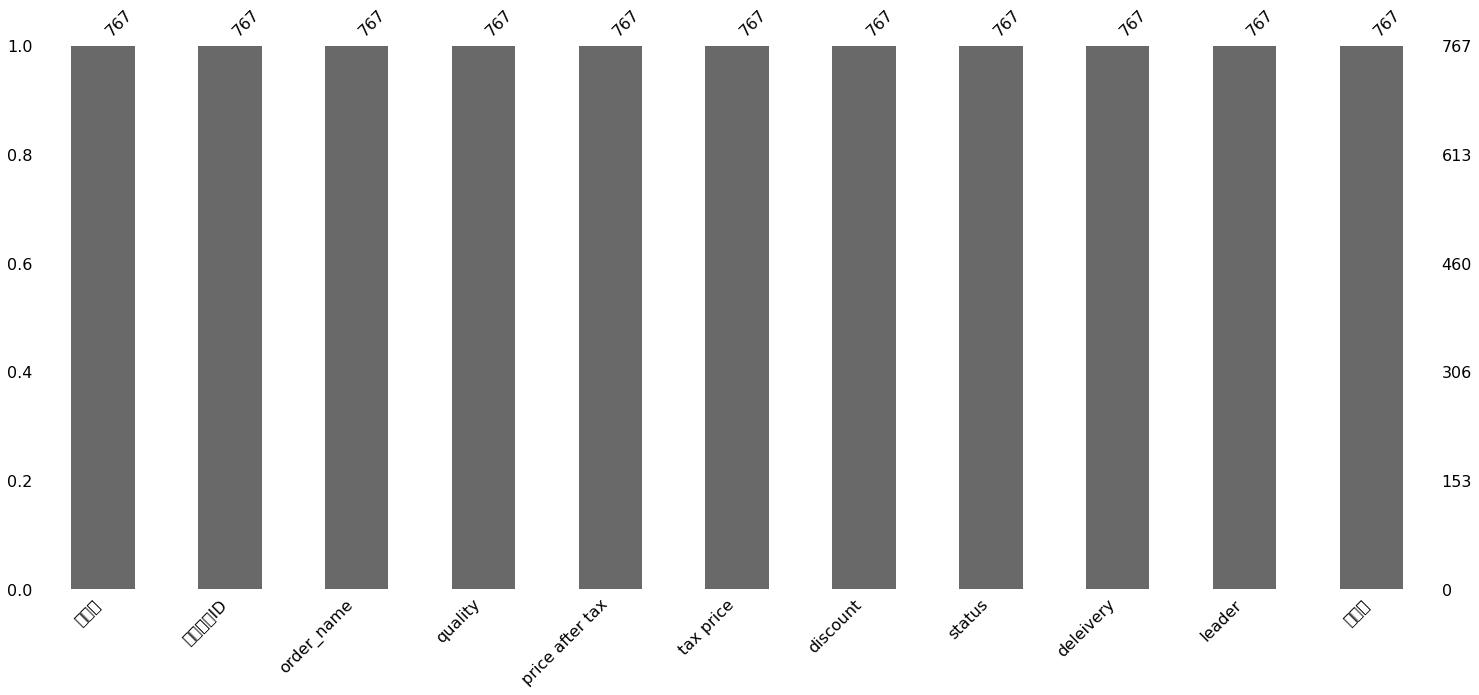

In [11]:
## null count analysis
import missingno as msno
p=msno.bar(df_ta)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21697 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35746 missing from current font.
  font.set_

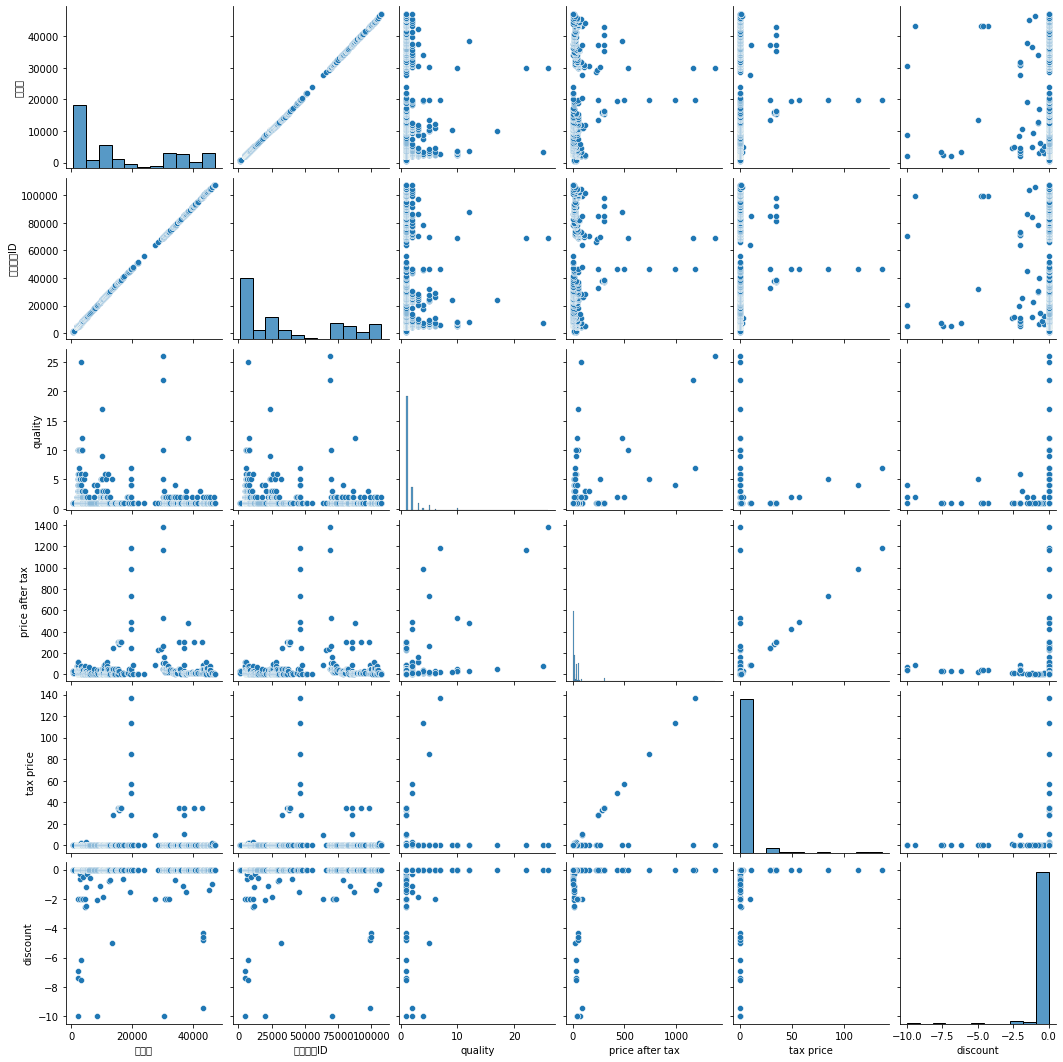

In [12]:
import seaborn as sns
p=sns.pairplot(df_ta)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21697 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 35746 missing from current font.
  font.set_

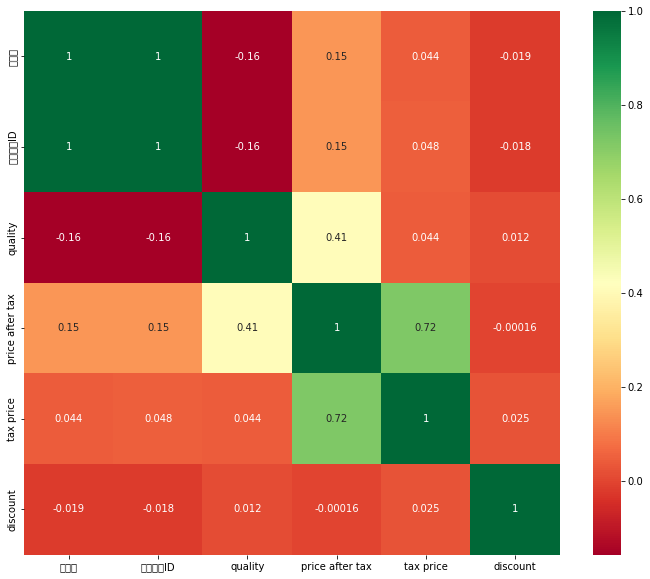

In [13]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df_ta.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [14]:
#clean data 
#plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
#p=sns.heatmap(df_ta_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [15]:
from sklearn.preprocessing import LabelEncoder

marry_encoder = LabelEncoder()


In [16]:
marry_encoder.fit(df_ta['order_name'])
LabelEncoder()

LabelEncoder()

In [17]:
x = marry_encoder.transform(df_ta['order_name'])
y=df_ta[['quality']]

In [18]:
#importing train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=42)

In [19]:
from os import pipe2
from sklearn import pipeline
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
x, y= make_classification(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [20]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [21]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


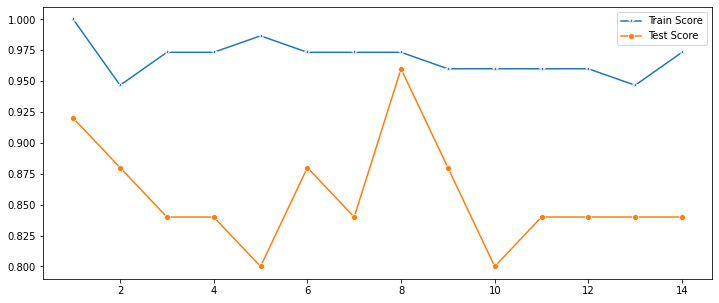

In [22]:
#visualization of result 
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [23]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(1)

knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.92

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


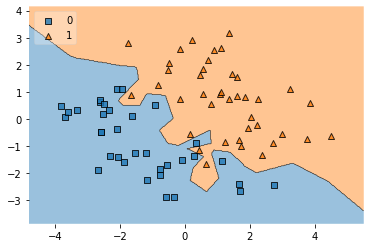

In [24]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train)
knn.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=knn, legend=2)

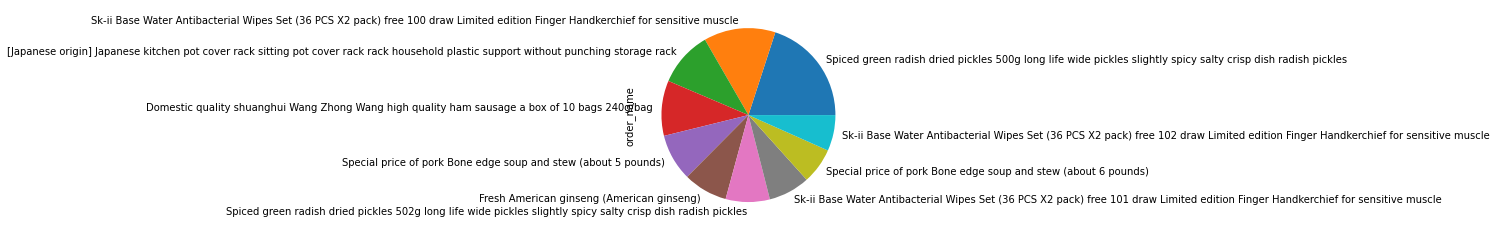

In [25]:
df_ta['order_name'].value_counts().head(10).plot.pie()

# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')